Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-12-01  167.479996  170.300003  164.529999  164.770004  163.819229   
2021-12-02  158.740005  164.199997  157.800003  163.759995  162.815063   
2021-12-03  164.020004  164.960007  159.720001  161.839996  160.906113   
2021-12-06  164.289993  167.880005  164.279999  165.320007  164.366074   
2021-12-07  169.080002  171.580002  168.339996  171.179993  170.192215   
...                ...         ...         ...         ...         ...   
2022-11-23  149.449997  151.830002  149.339996  151.070007  151.070007   
2022-11-25  148.309998  148.880005  147.119995  148.110001  148.110001   
2022-11-28  145.139999  146.639999  143.380005  144.220001  144.220001   
2022-11-29  144.28

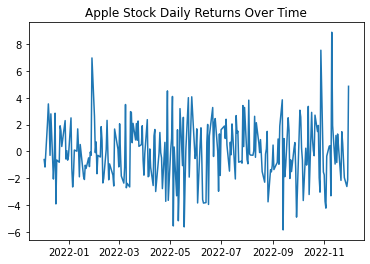

[-0.8826354178898099, 1.5094177461599134, 2.08005946295855, 1.2965469700934706, 0.6333505515595528, 7.555250145606562, -0.576725189575622, 0.9409425626236034, 1.531876878626437, 0.6833751132270249, 2.0918943546848645, 2.8013287454401015, -1.190892912179875, -3.224001981433555, -2.168020969565021, -2.1024777738847034, 0.32531383104996703, -2.0643210245224752, 1.9337567404898115, -0.833111207633952, 0.20533044519943644, 1.6342539511671417, 0.36438134358485197, -0.10155207595194948, 0.8537682593916074, -5.571617733980727, -0.4604974883602009, 3.5446316791349686, -5.641917621968318, -1.1627896231359958, -0.5346184543042365, 2.3152465006342826, -1.1676086470301161, 0.09883614473564784, -1.75427318745901, 2.04824772494705, 2.7059103837980825, 6.977766942076213, -0.8122001838294479, 2.1502787105003085, 4.10083315784322, -2.659988236212174, -1.9028065636177538, 1.4802693097965003, 0.1637785888235488, -1.7812287347162448, -0.3827107031419197, 2.319950475175747, 0.05020447322792165, 0.4706815210

ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

!pip install yfinance
import yfinance as yf

apple = yf.download("AAPL", start = "2021-12-01", end = "2022-12-01")

print(apple)

apple_return = (apple['Close'].pct_change())*100
plt.plot(apple_return, label = 'Daily Returns')
plt.title('Apple Stock Daily Returns Over Time')
plt.show()

apple.reset_index(drop=True, inplace=True)

X_train, X_test, y_train, y_test = None, None, None, None
X_train, X_test, y_train, y_test = train_test_split(apple_return, apple['Volume'], test_size=0.2, random_state=0)

X_train = [x for x in X_train if x != np.nan]
# <- here

print(X_train)
print("//////////////////////")
print(y_train)

regr = linear_model.LinearRegression().fit(X_train, y_train)

y_pred = None
y_pred = regr.predict(X_test)

rmse = 0
r2 = 0

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

plt.scatter(y_test, y_pred)
plt.show()